In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

In [4]:
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import numpy as np

# Use your loaded data
df = data
target = "Goals"

# Features & target split
X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()
numeric_cols = X_train.select_dtypes(exclude="object").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# ---------------------------
# RANDOM FOREST R²
# ---------------------------
rf_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=300, random_state=42))
])

rf_pipe.fit(X_train, y_train)
rf_preds = rf_pipe.predict(X_test)

rf_r2 = r2_score(y_test, rf_preds)

print(" Random Forest R²:", rf_r2)

# ---------------------------
# XGBOOST R²
# ---------------------------
xgb_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        objective='reg:squarederror',
        random_state=42
    ))
])

xgb_pipe.fit(X_train, y_train)
xgb_preds = xgb_pipe.predict(X_test)

xgb_r2 = r2_score(y_test, xgb_preds)

print(" XGBoost R²:", xgb_r2)


 Random Forest R²: 0.9881316339838306
 XGBoost R²: 0.9930061914499169


In [12]:
# df is already loaded — continue from here!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Target column
target = "Goals"

# Split features & target
X = df.drop(columns=[target])
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()
numeric_cols = X_train.select_dtypes(exclude="object").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# ---------------------------
# RANDOM FOREST
# ---------------------------
rf_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=300, random_state=42))
])

rf_pipe.fit(X_train, y_train)
rf_preds = rf_pipe.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(" Random Forest MAE:", rf_mae)
print(" Random Forest RMSE:", rf_rmse)

# ---------------------------
# XGBOOST
# ---------------------------
xgb_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        objective='reg:squarederror',
        random_state=42
    ))
])

xgb_pipe.fit(X_train, y_train)
xgb_preds = xgb_pipe.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print(" XGBoost MAE:", xgb_mae)
print(" XGBoost RMSE:", xgb_rmse)


 Random Forest MAE: 0.07493040293040291
 Random Forest RMSE: 0.3187658588551677
 XGBoost MAE: 0.06849816631251547
 XGBoost RMSE: 0.24469956913058755


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Use your already loaded data
df = data

# Target variable
target = "Assists"

# Features and labels
X = df.drop(columns=[target])
y = df[target]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Separate categorical and numeric columns
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()
numeric_cols = X_train.select_dtypes(exclude="object").columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# --------------------------------------------------
#  RANDOM FOREST
# --------------------------------------------------
rf_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=300, random_state=42))
])

rf_pipe.fit(X_train, y_train)
rf_preds = rf_pipe.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print(" RANDOM FOREST (Target = Assists)")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R²:", rf_r2)

# --------------------------------------------------
#  XGBOOST
# --------------------------------------------------
xgb_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        objective="reg:squarederror",
        random_state=42
    ))
])

xgb_pipe.fit(X_train, y_train)
xgb_preds = xgb_pipe.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

print("\n XGBOOST (Target = Assists)")
print("MAE:", xgb_mae)
print("RMSE:", xgb_rmse)
print("R²:", xgb_r2)


 RANDOM FOREST (Target = Assists)
MAE: 0.049076923076923074
RMSE: 0.2187792192241913
R²: 0.9851240378719489

 XGBOOST (Target = Assists)
MAE: 0.05186789938565508
RMSE: 0.23169546010058886
R²: 0.9833157005393669


In [14]:
data.head()


,Unnamed: 0,Age,Matches Played,Starts,Minutes,90s Played,Goals,Assists,Goals Per 90,Assists Per 90,Non-Penalty Goals Per 90,xG Per 90,xAG Per 90,npxG Per 90
0,AT,32,38,38,3371,37.5,29,18,0.77,0.48,0.53,0.67,0.38,0.49
1,DF,33,37,37,3330,37.0,3,1,0.08,0.03,0.08,0.06,0.02,0.06
2,MT,22,37,37,3160,35.1,0,4,0.00,0.11,0.00,0.03,0.09,0.03
3,MT,25,35,30,2599,28.9,5,5,0.17,0.17,0.17,0.10,0.16,0.10
4,DF,25,31,30,2560,28.4,1,2,0.04,0.07,0.04,0.06,0.03,0.06


In [18]:
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

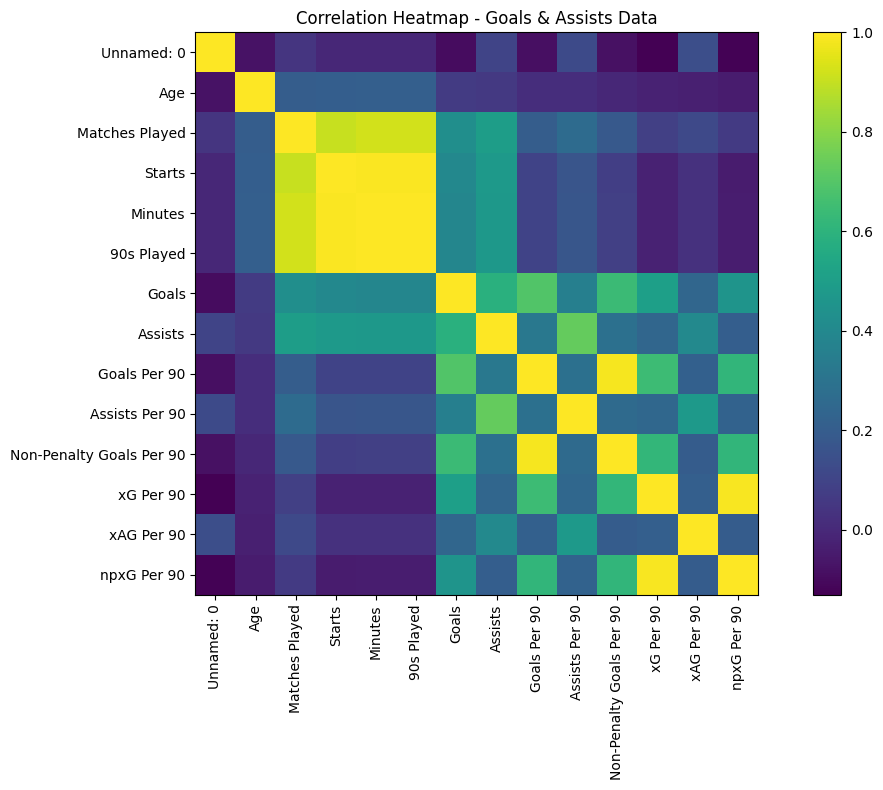

In [19]:
data_numeric = data.copy()
data_numeric["Unnamed: 0"] = data_numeric["Unnamed: 0"].astype("category").cat.codes

import matplotlib.pyplot as plt

corr = data_numeric.corr()

plt.figure(figsize=(12, 8))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap - Goals & Assists Data")
plt.tight_layout()
plt.show()


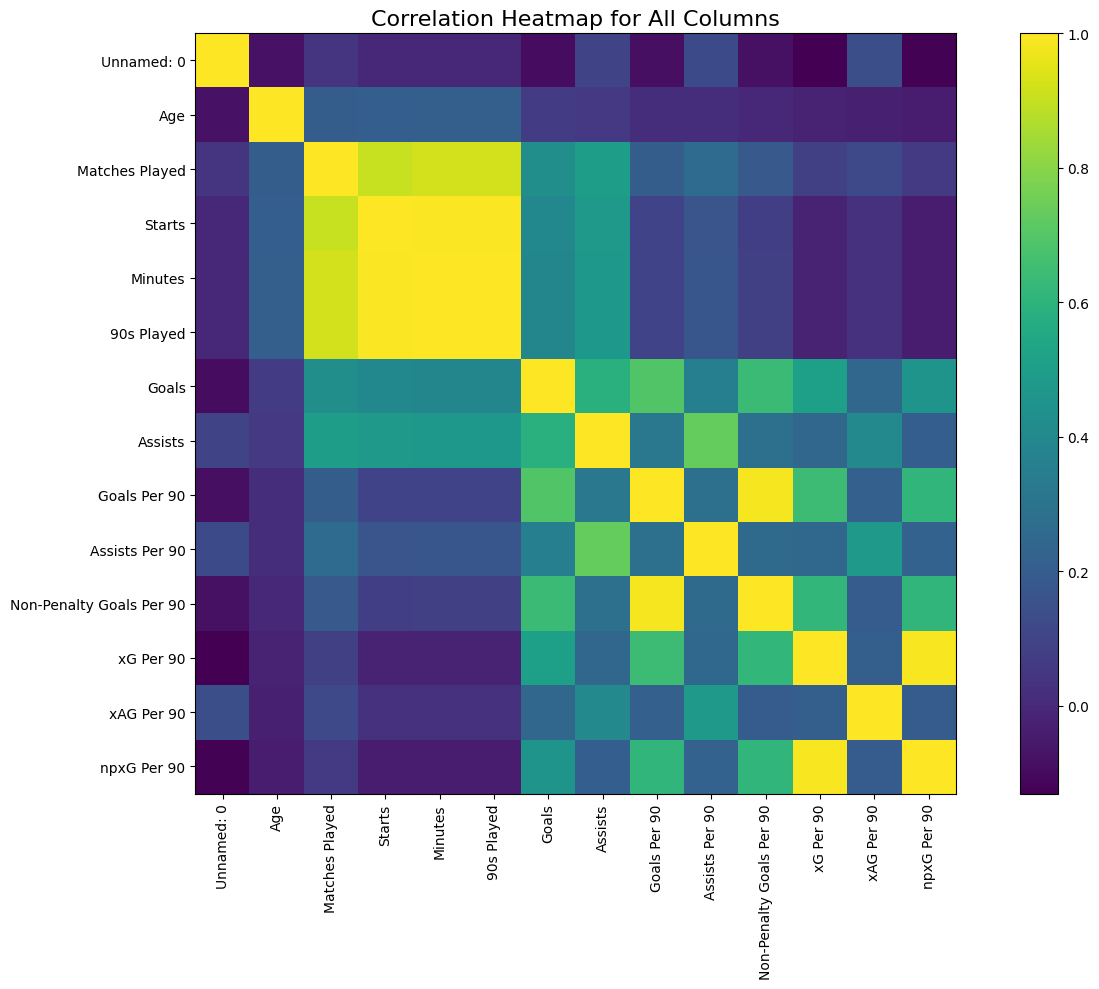

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Load your dataset
# Replace with your correct path
# data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

df = data.copy()   # if already loaded

# STEP 2: Convert all non-numeric columns to numeric codes
df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":   # categorical
        df_encoded[col] = df_encoded[col].astype("category").cat.codes

# STEP 3: Compute correlation for ALL columns
corr = df_encoded.corr()

# STEP 4: Plot heatmap (matplotlib)
plt.figure(figsize=(14, 10))
plt.imshow(corr, interpolation="nearest")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap for All Columns", fontsize=16)
plt.tight_layout()
plt.show()


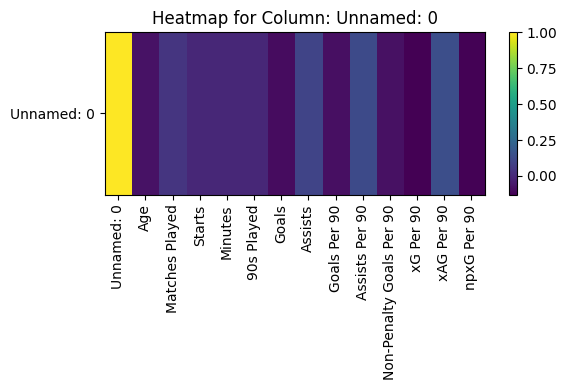

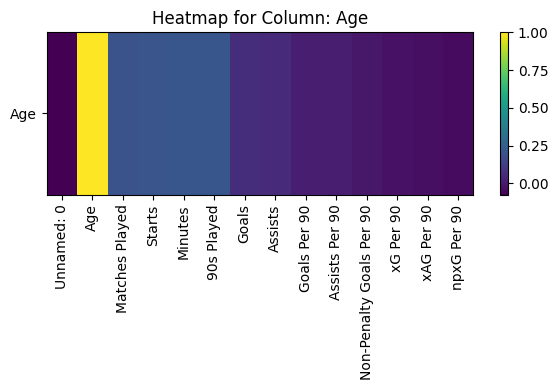

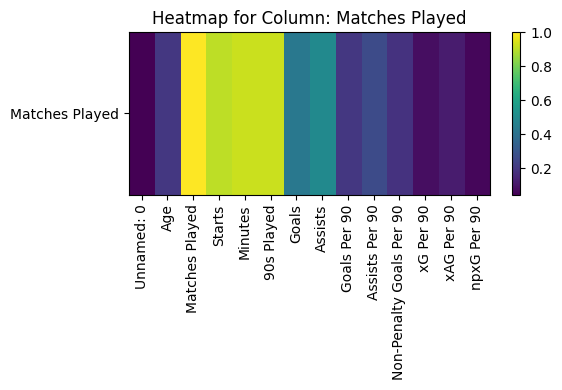

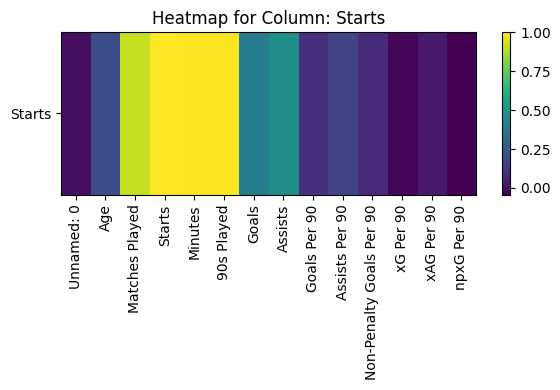

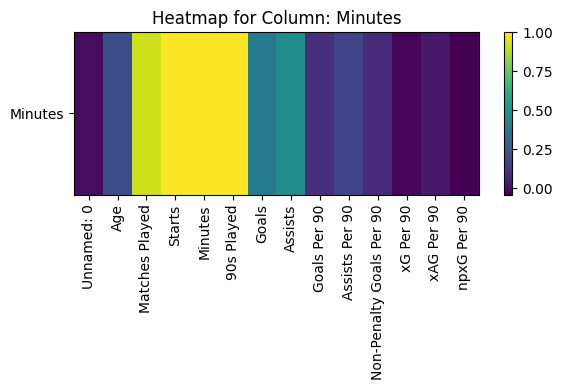

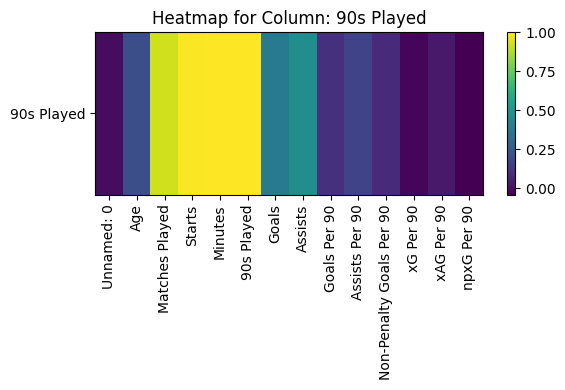

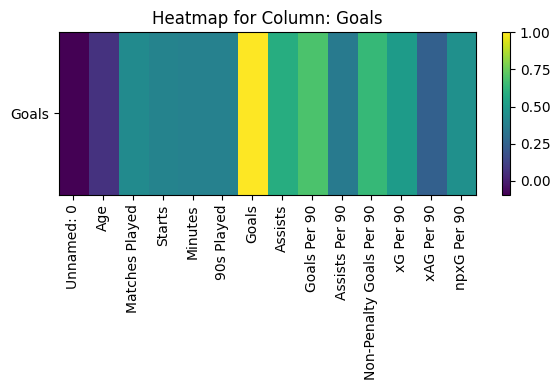

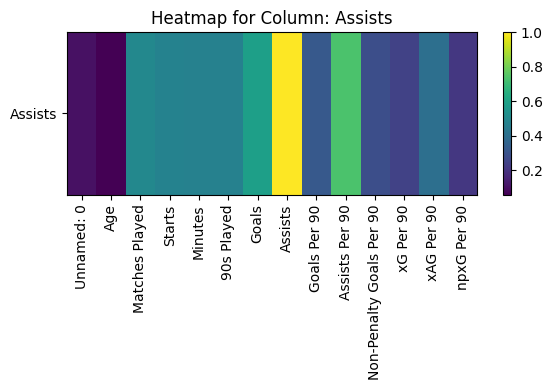

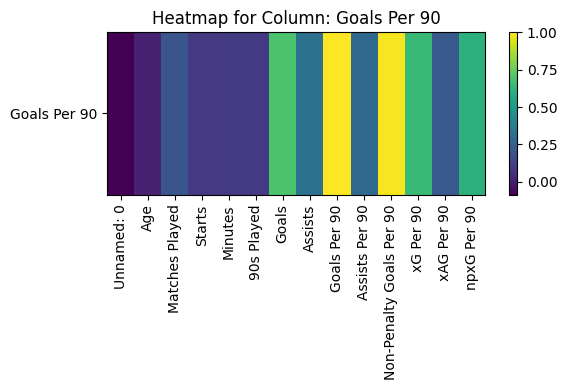

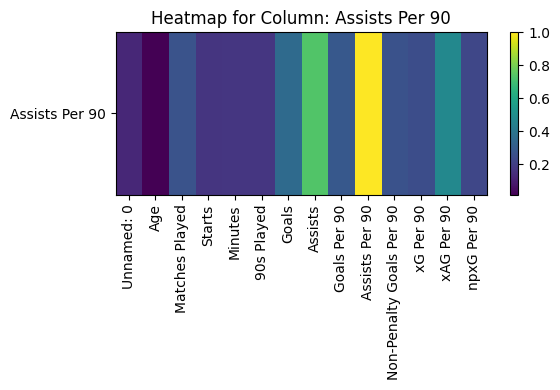

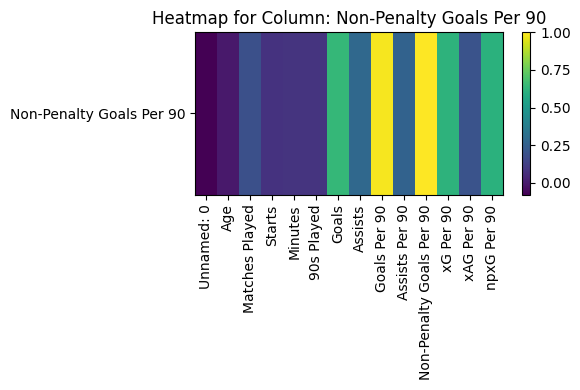

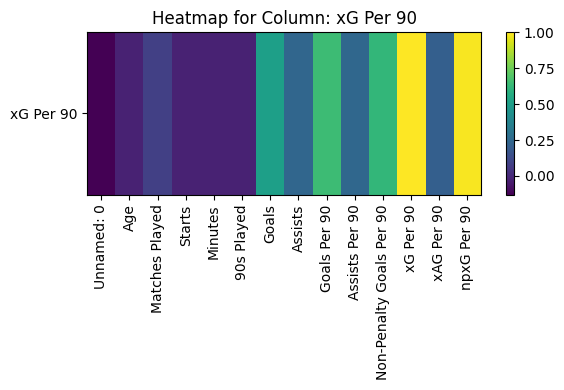

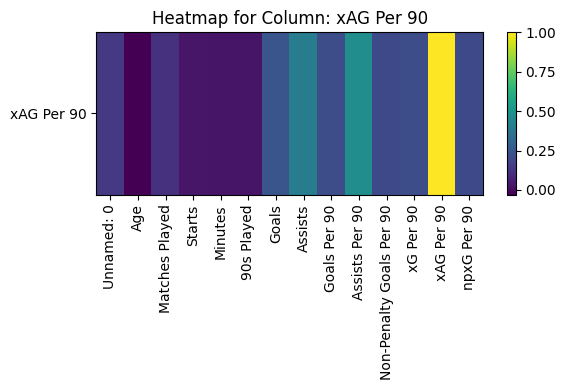

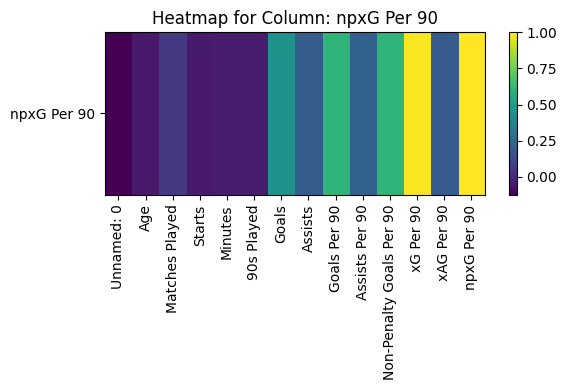

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Use your loaded dataframe
df = data.copy()

# Convert categorical columns to numeric codes
df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Compute correlation matrix
corr = df_encoded.corr()

# Generate a heatmap for EACH column separately
for col in corr.columns:
    plt.figure(figsize=(6, 4))
    plt.imshow(corr[[col]].T, cmap='viridis', aspect="auto")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks([0], [col])
    plt.title(f"Heatmap for Column: {col}")
    plt.tight_layout()
    plt.show()
